# Setup

In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import unicode_literals

%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


# MNIST - CNN

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

DATA_PATH='/Volumes/RogerDrive/Developer/dataset/tensorflow_data/'
mnist = input_data.read_data_sets(DATA_PATH, one_hot=True)

Extracting /Volumes/RogerDrive/Developer/dataset/tensorflow_data/train-images-idx3-ubyte.gz
Extracting /Volumes/RogerDrive/Developer/dataset/tensorflow_data/train-labels-idx1-ubyte.gz
Extracting /Volumes/RogerDrive/Developer/dataset/tensorflow_data/t10k-images-idx3-ubyte.gz
Extracting /Volumes/RogerDrive/Developer/dataset/tensorflow_data/t10k-labels-idx1-ubyte.gz


In [60]:
learning_rate = 1e-4
epochs = 200
batch_size = 100
nb_batch = mnist.train.num_examples // batch_size
display_step = 200
cost_history = list()

In [83]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


x_image = tf.reshape(x, shape=[-1, 28, 28, 1])

def add_conv_max_pool_2(x, f_w, f_h):
    prev_h = int(x.shape[3])
    W_conv1 = weight_variable([f_w, f_w, prev_h, f_h])
    b_conv1 = bias_variable([f_h])
    h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)
    return h_pool1


def flatten_fully(x, output_dim):
    flatten_dim = int(x.shape[1]) * int(x.shape[2]) * int(x.shape[3])
    W_fc1 = weight_variable([flatten_dim, output_dim])
    b_fc1 = bias_variable([output_dim])
    h_pool2_flat = tf.reshape(x, [-1, flatten_dim])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    return h_fc1
    

h_conv_pool1 = add_conv_max_pool_2(x_image, 5, 32)
h_conv_pool2 = add_conv_max_pool_2(h_conv_pool1, 5, 64)
h_fc1 = flatten_fully(h_conv_pool2, 1024)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# W_conv1 = weight_variable([5, 5, 1, 32])
# b_conv1 = bias_variable([32])
# h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
# h_pool1 = max_pool_2x2(h_conv1)


# W_conv2 = weight_variable([5, 5, 32, 64])
# b_conv2 = bias_variable([64])
# h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
# h_pool2 = max_pool_2x2(h_conv2)

# W_fc1 = weight_variable([7 * 7 * 64, 1024])
# b_fc1 = bias_variable([1024])

# h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
# h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# keep_prob = tf.placeholder(tf.float32)
# h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# W_fc2 = weight_variable([1024, 10])
# b_fc2 = bias_variable([10])

# y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [84]:
y_conv

<tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>

In [62]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(y_, 1), tf.arg_max(y_conv, 1)), tf.float32))

In [63]:
with tf.Session() as sess:
    cost_history = list()
    tf.global_variables_initializer().run()
    
    for epoch in range(1, epochs + 1):
        for n_batch in range(1, nb_batch + 1):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            feed = {x: x_batch, y_: y_batch, keep_prob: 0.5}
            _, loss = sess.run([train_step, cost], feed_dict=feed)
            cost_history.append(loss)
            if epoch * n_batch % display_step == 0:
                acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
                print("epoch: {}, n_batch: {}, loss: {}, accuracy: {}".format(epoch, n_batch, loss, acc))

epoch: 1, n_batch: 200, loss: 0.457130074501, accuracy: 0.926500022411
epoch: 1, n_batch: 400, loss: 0.213493391871, accuracy: 0.949299991131
epoch: 2, n_batch: 100, loss: 0.223415032029, accuracy: 0.96439999342
epoch: 2, n_batch: 200, loss: 0.105642773211, accuracy: 0.96850001812
epoch: 2, n_batch: 300, loss: 0.152693152428, accuracy: 0.969799995422
epoch: 2, n_batch: 400, loss: 0.143822550774, accuracy: 0.972500026226
epoch: 2, n_batch: 500, loss: 0.0842172056437, accuracy: 0.972500026226
epoch: 3, n_batch: 200, loss: 0.12978425622, accuracy: 0.976800024509
epoch: 3, n_batch: 400, loss: 0.0487986057997, accuracy: 0.979700028896
epoch: 4, n_batch: 50, loss: 0.0722247064114, accuracy: 0.98140001297
epoch: 4, n_batch: 100, loss: 0.0928643718362, accuracy: 0.982299983501
epoch: 4, n_batch: 150, loss: 0.0650403276086, accuracy: 0.982200026512
epoch: 4, n_batch: 200, loss: 0.0550962798297, accuracy: 0.980099976063
epoch: 4, n_batch: 250, loss: 0.100935727358, accuracy: 0.981199979782
epoch

KeyboardInterrupt: 

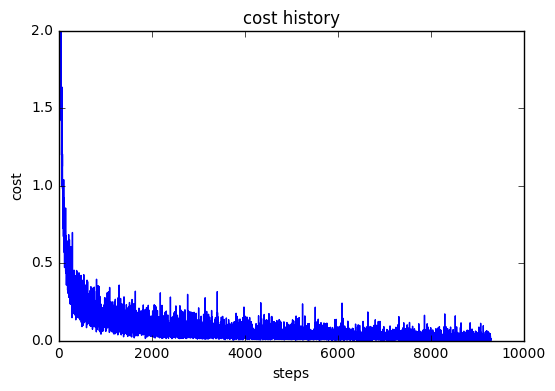

In [91]:
plt.plot(np.array(cost_history))
plt.title('cost history')
plt.ylim([0, 2])
plt.xlabel('steps')
plt.ylabel('cost')
plt.show()

# Document Classifier

In [92]:
# How can we read images? -> scipy.misc.imread
# How about labels? 
# What libraries offering these functionality？ -
# QC?

In [2]:
import scipy.misc as misc

In [98]:
dog_img = misc.imread('img/dog.jpg')

In [102]:
dog_img = dog_img / 255

In [104]:
dog_img.shape

(194, 259, 3)

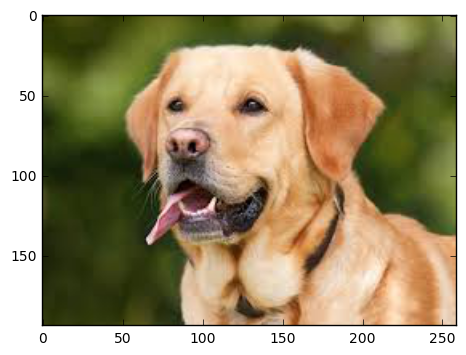

In [105]:
imshow(dog_img)

## Preprocess Images 

In [3]:
import os
DIRNAMR = 'img/HPEImages'
NORM_AXIS_0 = 300
NORM_AXIS_1 = 400

images = []
labels = []

for img_name in os.listdir(DIRNAMR):
    label = img_name.split('.')[0][:-1]
    image = misc.imread(DIRNAMR + '/' + img_name)
    resized_img = misc.imresize(image, (NORM_AXIS_0, NORM_AXIS_1))
    labels.append(label)
    images.append(resized_img)

In [4]:
for label, img in zip(labels, images):
    print(label, img.shape)

bg (300, 400, 3)
bg (300, 400, 3)
bg (300, 400, 3)
bg (300, 400, 3)
bg (300, 400, 3)
bg (300, 400, 3)
building (300, 400, 3)
building (300, 400, 3)
cathay (300, 400, 3)
cathay (300, 400, 3)
cathay (300, 400, 3)
cathay (300, 400, 3)
cathay (300, 400, 3)
cathay (300, 400, 3)
name (300, 400, 3)
name (300, 400, 3)
name (300, 400, 3)
name (300, 400, 3)
nid (300, 400, 3)
nid (300, 400, 3)
nid (300, 400, 3)
nid (300, 400, 3)
nid (300, 400, 3)
nid (300, 400, 3)
own (300, 400, 3)
own (300, 400, 3)
own (300, 400, 3)
own (300, 400, 3)
own (300, 400, 3)
own (300, 400, 3)
res (300, 400, 3)
res (300, 400, 3)
res (300, 400, 3)
res (300, 400, 3)
res (300, 400, 3)
visa (300, 400, 3)
visa (300, 400, 3)
visa (300, 400, 3)
visa (300, 400, 3)
visa (300, 400, 3)
visa (300, 400, 3)


In [5]:
images = np.array(images)
images = images / 255
images.shape

(41, 300, 400, 3)

In [6]:
images[0:3, :]

array([[[[ 0.87843137,  0.86666667,  0.83921569],
         [ 0.8745098 ,  0.8627451 ,  0.83529412],
         [ 0.87058824,  0.85882353,  0.83137255],
         ..., 
         [ 0.83137255,  0.83137255,  0.82352941],
         [ 0.83137255,  0.83137255,  0.82352941],
         [ 0.83529412,  0.83529412,  0.82745098]],

        [[ 0.8745098 ,  0.8627451 ,  0.83529412],
         [ 0.87058824,  0.85882353,  0.83137255],
         [ 0.86666667,  0.85490196,  0.82745098],
         ..., 
         [ 0.83921569,  0.83921569,  0.83137255],
         [ 0.84313725,  0.84313725,  0.83529412],
         [ 0.84705882,  0.84705882,  0.83921569]],

        [[ 0.8745098 ,  0.8627451 ,  0.83529412],
         [ 0.86666667,  0.85490196,  0.82745098],
         [ 0.8627451 ,  0.85098039,  0.82352941],
         ..., 
         [ 0.83529412,  0.83529412,  0.82745098],
         [ 0.84313725,  0.84313725,  0.83529412],
         [ 0.85098039,  0.85098039,  0.84313725]],

        ..., 
        [[ 0.88235294,  0.87058824,

In [7]:
labels = np.array(labels)
labels

array([u'bg', u'bg', u'bg', u'bg', u'bg', u'bg', u'building', u'building',
       u'cathay', u'cathay', u'cathay', u'cathay', u'cathay', u'cathay',
       u'name', u'name', u'name', u'name', u'nid', u'nid', u'nid', u'nid',
       u'nid', u'nid', u'own', u'own', u'own', u'own', u'own', u'own',
       u'res', u'res', u'res', u'res', u'res', u'visa', u'visa', u'visa',
       u'visa', u'visa', u'visa'], 
      dtype='<U8')

In [8]:
uniques, ids = np.unique(labels, return_inverse=True)
uniques, ids

(array([u'bg', u'building', u'cathay', u'name', u'nid', u'own', u'res',
        u'visa'], 
       dtype='<U8'),
 array([0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4,
        4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7]))

In [9]:
from keras.utils import np_utils
one_hot_labels = np_utils.to_categorical(ids, len(uniques))

Using TensorFlow backend.


In [10]:
one_hot_labels[:5]

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [11]:
one_hot_labels[[1, 15, 35]]

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

## Minibatch 

In [59]:
def make_batch_gen(features, labels, batch_size):
    curr_idx = 0
    data_size = features.shape[0]
    
    while True:
        x_batch = []
        y_batch = [] 
        for i in range(batch_size): 
            if curr_idx == 0:
                indices = np.random.permutation(data_size)
                features = features[indices]
                labels = labels[indices]
            x_batch.append(features[curr_idx])
            y_batch.append(labels[curr_idx])
            
            curr_idx += 1
            if curr_idx == data_size:
                curr_idx = 0
        yield np.array(x_batch), np.array(y_batch)

In [60]:
next_batch_img = make_batch_gen(images, one_hot_labels, 5)

In [61]:
x_batch, y_batch = next(next_batch_img)
y_batch

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [80]:
x_batch.shape, y_batch.shape

((5, 600, 800, 3), (5, 8))

## CNN model 

In [41]:
output_dim = uniques.shape[0]

In [62]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W, s):
    return tf.nn.conv2d(x, W, strides=[1, s, s, 1], padding='SAME')

def max_pool_nxn(x, n):
    return tf.nn.max_pool(x, ksize=[1, n, n, 1],
                        strides=[1, n, n, 1], padding='SAME')

def add_conv_max_pool_2(x, f_w, f_h, s, n):
    prev_h = int(x.shape[3])
    W_conv1 = weight_variable([f_w, f_w, prev_h, f_h])
    b_conv1 = bias_variable([f_h])
    h_conv1 = tf.nn.relu(conv2d(x, W_conv1, s) + b_conv1)
    h_pool1 = max_pool_nxn(h_conv1, n)
    return h_pool1


def flatten_fully(x, output_dim):
    flatten_dim = int(x.shape[1]) * int(x.shape[2]) * int(x.shape[3])
    W_fc1 = weight_variable([flatten_dim, output_dim])
    b_fc1 = bias_variable([output_dim])
    h_pool2_flat = tf.reshape(x, [-1, flatten_dim])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    return h_fc1

In [80]:
learning_rate = 1e-4
epochs = 50
data_size = images.shape[0]
batch_size = 5
nb_batch = data_size // batch_size
display_step = 10

In [81]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, NORM_AXIS_0, NORM_AXIS_1, 3])
y_ = tf.placeholder(tf.float32, [None, 8])

h_conv_pool1 = add_conv_max_pool_2(x, 5, 32, 2, 4)
h_conv_pool2 = add_conv_max_pool_2(h_conv_pool1, 5, 64, 2, 4)
h_fc1 = flatten_fully(h_conv_pool2, 1024)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, output_dim])
b_fc2 = bias_variable([output_dim])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [82]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(y_, 1), tf.arg_max(y_conv, 1)), tf.float32))

In [83]:
cost_history = list()
acc_history = list()

with tf.Session() as sess:
    next_batch_img = make_batch_gen(images, one_hot_labels, batch_size)
    tf.global_variables_initializer().run()
    
    for epoch in range(epochs):
        for n_batch in range(nb_batch):
            x_batch, y_batch = next(next_batch_img)
            feed = {x: x_batch, y_: y_batch, keep_prob: 0.5}
            _, loss = sess.run([train_step, cost], feed_dict=feed)
            cost_history.append(loss)
            if (epoch+1) * (n_batch+1) % display_step == 0:
                acc = accuracy.eval(feed_dict={x: images, y_: one_hot_labels, keep_prob: 1.0})
                acc_history.append(acc)
                print("epoch: {}, n_batch: {}, loss: {}, train_accuracy: {}".format(epoch, n_batch, loss, acc))

epoch: 1, n_batch: 4, loss: 15.3952817917, train_accuracy: 0.31707316637
epoch: 3, n_batch: 4, loss: 13.2529325485, train_accuracy: 0.243902444839
epoch: 4, n_batch: 1, loss: 8.78704547882, train_accuracy: 0.146341457963
epoch: 4, n_batch: 3, loss: 16.9459590912, train_accuracy: 0.292682915926
epoch: 4, n_batch: 5, loss: 8.55099105835, train_accuracy: 0.243902444839
epoch: 4, n_batch: 7, loss: 3.917573452, train_accuracy: 0.268292695284
epoch: 5, n_batch: 4, loss: 13.9432468414, train_accuracy: 0.414634138346
epoch: 7, n_batch: 4, loss: 6.92823266983, train_accuracy: 0.487804889679
epoch: 9, n_batch: 0, loss: 3.81495666504, train_accuracy: 0.68292683363
epoch: 9, n_batch: 1, loss: 3.78204989433, train_accuracy: 0.68292683363
epoch: 9, n_batch: 2, loss: 9.25227832794, train_accuracy: 0.731707334518
epoch: 9, n_batch: 3, loss: 4.43970775604, train_accuracy: 0.756097555161
epoch: 9, n_batch: 4, loss: 6.98216342926, train_accuracy: 0.756097555161
epoch: 9, n_batch: 5, loss: 6.85583114624, 

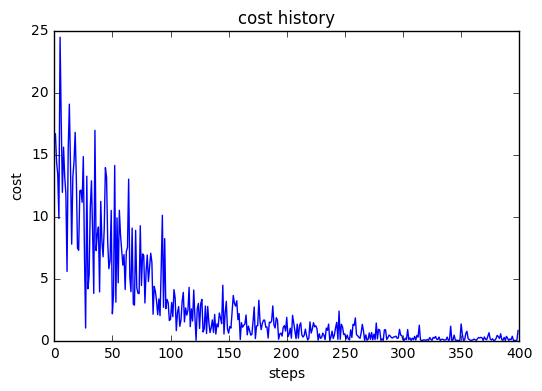

In [91]:
plt.plot(np.array(cost_history))
plt.title('cost history')
plt.xlabel('steps')
plt.ylabel('cost')
plt.show()

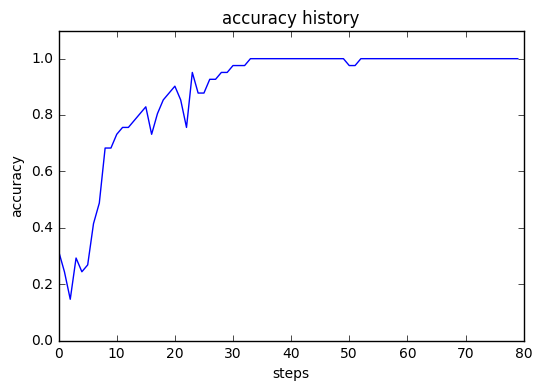

In [95]:
plt.plot(np.array(acc_history))
plt.title('accuracy history')
plt.ylim([0, 1.1])
plt.xlabel('steps')
plt.ylabel('accuracy')
plt.show()